# MultiCat Image Classification
> Creating a Multi Category image classifier - Pet Breeds!

- toc: true 
- badges: true
- comments: true
- hide: true
- author: Isaac Flath
- categories: [Neural Networks, Image Classification]

# Intro

# Get Data

In [36]:
from fastai2.vision.all import *
import pandas as pd
from functools import partial
warnings.filterwarnings("ignore")
path = untar_data(URLs.PASCAL_2007)

In [4]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


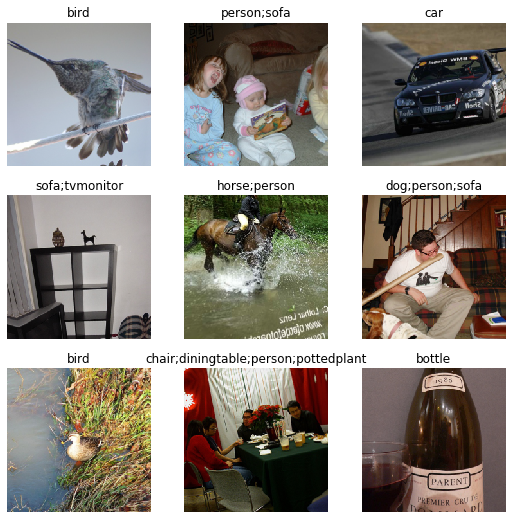

In [5]:
dls = ImageDataLoaders.from_df(train, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

dls.show_batch()

# Modeling

### Train the Model

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.033113110810518265)

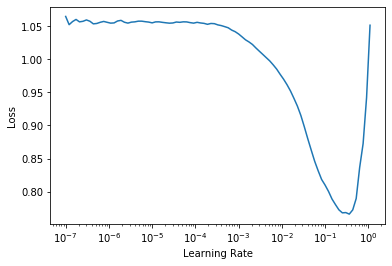

In [24]:
learn = cnn_learner(dls,arch = resnet34,metrics = accuracy_multi)

learn.freeze()
learn.lr_find()


In [25]:
learn.fit_one_cycle(4,5e-2)

epoch,train_loss,valid_loss,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,time
0,0.438574,0.546310,0.815638,0.838665,0.853606,0.863586,0.872251,0.880578,0.888147,0.896833,0.908028,00:13
1,0.281783,0.171942,0.884343,0.914881,0.927231,0.934143,0.938287,0.941195,0.943207,0.944064,0.942669,00:12
2,0.200328,0.134201,0.893884,0.931554,0.942988,0.949004,0.951534,0.951633,0.950000,0.948426,0.944542,00:13
3,0.155484,0.116792,0.906673,0.939980,0.951594,0.956036,0.958028,0.957570,0.955617,0.952311,0.947430,00:13


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.981071586167673e-06)

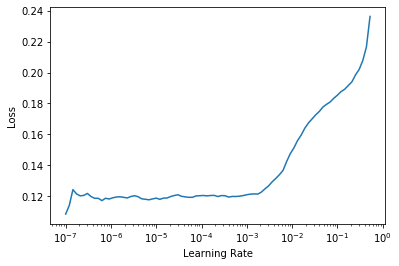

In [26]:
learn.unfreeze()
learn.lr_find()

In [27]:
learn.fit_one_cycle(4,slice(1e-4/100,1e-4))

epoch,train_loss,valid_loss,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,accuracy_multi,time
0,0.117964,0.115152,0.909343,0.940717,0.952570,0.957032,0.958625,0.958108,0.955837,0.952829,0.947888,00:13
1,0.116206,0.113654,0.911693,0.942630,0.953725,0.958466,0.959263,0.957988,0.956175,0.952271,0.947789,00:13
2,0.113402,0.112511,0.909123,0.942012,0.953705,0.957649,0.959442,0.958685,0.956613,0.953008,0.948207,00:13
3,0.112153,0.112307,0.910159,0.942271,0.953924,0.958167,0.959502,0.958805,0.956693,0.953048,0.948406,00:13


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=1.5848931980144698e-06)

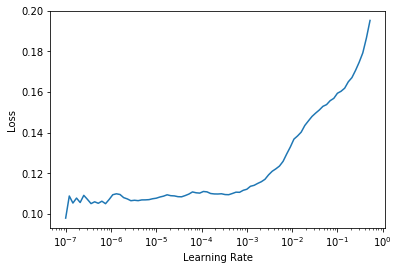

In [28]:
learn.freeze_to(-2)
learn.lr_find()

In [30]:
learn.metrics = 

In [31]:
learn.fit_one_cycle(2, 1e-5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.110006,0.112494,0.959064,00:13
1,0.109577,0.111314,0.959861,00:13


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


SuggestedLRs(lr_min=9.120108734350651e-06, lr_steep=2.75422871709452e-06)

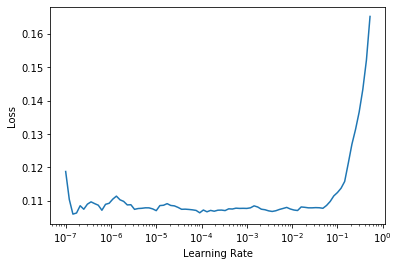

In [32]:
learn.freeze_to(-1)
learn.lr_find()

In [37]:
learn.fit_one_cycle(3,5e-3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.099295,0.108779,0.960797,00:12


### Accuracy Threshhold

Another thing to consider is the accuracy threshhold.  If a class score is > 0.5, should we consider that class a match?  Or should it require a score of > 0.6?  I reccomend playing with the threshold to see what works for your application. 

In [ ]:
learn = cnn_learner(dls,arch = resnet34,metrics = [partial(accuracy_multi,thresh=x) for x in np.array(range(1,10))/10])


### Loss Function

With this multi-category, we use binary cross-entropy instead of normal cross-entropy.  This is because normal cross entropy uses a softmax, which makes all probabilities add to 1.  That makes a ton of sense when we only have 1 class, but with multiple it doesn't.  Softmax in the loss function makes it much harder to train as it forces class probabilities to sum to 1, when there may in fact have multiple classes (or no classes).